In [ ]:
# from google.colab import drive
# drive.mount('/content/drive') 

Mounted at /content/drive


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 

In [2]:
! chmod 600 ~/.kaggle/kaggle.json 

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification 

100% 345M/346M [00:09<00:00, 38.7MB/s]
100% 346M/346M [00:09<00:00, 36.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close() 

In [5]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import os , cv2 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import keras 
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Input, Dropout

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_train/seg_train',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256) 
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/seg_test/seg_test',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [7]:
# paths=['/content/seg_train/seg_train','/content/seg_test/seg_test']
# labels = []
# for folder in os.listdir(paths[0]):
#     labels.append(folder)

# print(labels)

In [8]:
# dicc_labels={i:labels[i] for i in range(0,len(labels))}
# dicc_labels 

In [9]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [10]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label 

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process) 

In [11]:
# s=256

In [12]:
# modelo = Sequential()
# modelo.add(Input(shape=(s,s,3)))
# modelo.add(Convolution2D(s, kernel_size=3, activation="relu", padding="valid"))
# modelo.add(MaxPooling2D(pool_size=(2,2)))
# modelo.add(Convolution2D(s*2, kernel_size=3, activation="relu", padding="valid"))
# modelo.add(MaxPooling2D(pool_size=(2,2)))
# modelo.add(Convolution2D(s/2, kernel_size=3, activation="relu", padding="valid"))
# modelo.add(MaxPooling2D(pool_size=(2,2)))
# modelo.add(Flatten())
# modelo.add(Dropout(0.5))
# modelo.add(Dense(6, activation="softmax"))

# modelo.compile(optimizer="adam", loss="categorical_crossentropy",
#                metrics=["accuracy","Precision"]
# )

# modelo.summary()

In [13]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(12, activation="softmax"))
model.add(Dropout(0.3))
model.add(Dense(6, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs= 15,validation_data=validation_ds)  

Epoch 1/15
439/439 [==============================] - 64s 115ms/step - loss: 9.0106 - accuracy: 0.5559 - val_loss: 5.8056 - val_accuracy: 0.5273
Epoch 2/15
439/439 [==============================] - 48s 108ms/step - loss: 5.8288 - accuracy: 0.6662 - val_loss: 10.1597 - val_accuracy: 0.4827
Epoch 3/15
439/439 [==============================] - 48s 108ms/step - loss: 3.4146 - accuracy: 0.7322 - val_loss: 3.9524 - val_accuracy: 0.6440
Epoch 4/15
439/439 [==============================] - 48s 108ms/step - loss: 1.8885 - accuracy: 0.7941 - val_loss: 3.5555 - val_accuracy: 0.6977
Epoch 5/15
439/439 [==============================] - 48s 108ms/step - loss: 1.0631 - accuracy: 0.8475 - val_loss: 3.0610 - val_accuracy: 0.7333
Epoch 6/15
439/439 [==============================] - 48s 109ms/step - loss: 0.6862 - accuracy: 0.8824 - val_loss: 2.7027 - val_accuracy: 0.7460
Epoch 7/15
439/439 [==============================] - 48s 108ms/step - loss: 0.4877 - accuracy: 0.9074 - val_loss: 2.9832 - val_a

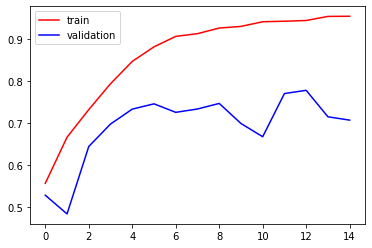

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show() 

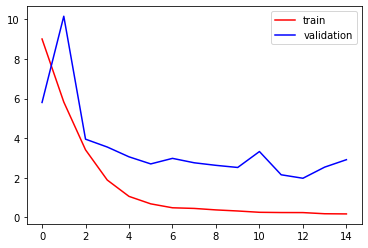

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [44]:
test_img = cv2.imread('/content/forest_2.jpeg')

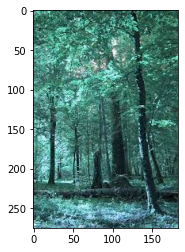

In [45]:
plt.imshow(test_img)

In [46]:
test_img.shape

(275, 183, 3)

In [47]:
test_img_scale=cv2.resize(test_img,(256,256))

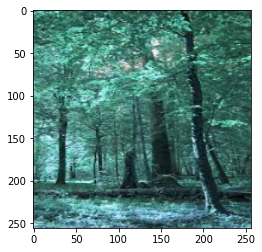

In [48]:
plt.imshow(test_img_scale)

In [49]:
test_input=test_img_scale.reshape((1,256,256,3))

In [50]:
model.predict(test_input) 

1/1 [==============================] - 0s 16ms/step


array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

In [51]:
np.argmax(model.predict(test_input)) 

1/1 [==============================] - 0s 16ms/step


1

In [ ]:
# y = np.concatenate([y for x, y in validation_ds], axis=0)
# y1=np.concatenate([x for x, y in validation_ds], axis=0)
# y1

In [ ]:
# plt.imshow(y1[1])

In [ ]:
# model.predict(y1[[1]])

In [ ]:
# np.argmax(model.predict(y1[[1]]))

In [ ]:
# ds_labels=[]
# ds_images=[]
# for images, labels in validation_ds.unbatch():
#     ds_labels.append(labels)
#     ds_images.append(images)

# ds_labels

In [ ]:
# pred = model.predict(validation_ds)
# print(classification_report(
#     np.argmax(ds_labels,axis=1),
#     np.argmax(pred,axis=1)
# ))